In [21]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [14]:
# Load House Price Dataset from Github to a dataframe
df = pd.read_csv('https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true')

In [15]:
#Getting to know the data
df.head(20)

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
5,b. 31-40,e. High,c. High,a. = 0,b. Mid,d. 14,d. Masters,b. income,d. 36-40 & 56-60,train,0
6,a. 0-30,a. Low,b. Mid,a. = 0,a. Low,a. 0-8,a. Low,b. income,e. 40-55,train,0
7,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train,1
8,d. 41-50 & 61-70,e. High,b. Mid,c. > 0,b. Mid,d. 14,d. Masters,b. income,c. 31-35 & 61-70,train,1
9,b. 31-40,e. High,c. High,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,1


In [4]:
## print the shape of the dataframe
print(df.shape)
#There are 11 columns and 48842 rows

(48842, 11)


In [5]:
#  Show the DataFrame's data types
pd.set_option('display.max_rows', None)
print(df.dtypes)

# We observe all categorical functions, except for the "y" target column, which is a numerical value.

hours_per_week_bin    object
occupation_bin        object
msr_bin               object
capital_gl_bin        object
race_sex_bin          object
education_num_bin     object
education_bin         object
workclass_bin         object
age_bin               object
flag                  object
y                      int64
dtype: object


# **Data cleaning and transformation**

In [16]:
## 1. Inconsistent Categorical Values

# Eliminate irrelavant characters in DataFrame for all columns except 'flag' and 'y'
for col in df.drop(columns = ["flag","y"]):
    df[col] = df[col].str.split(".", n=1, expand = True)[1]

df.head(10)
# Looking at our data, we see that the letters and periods in front of each value have been removed!

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,31-40,Mid - Low,Mid,> 0,High,13,Bachelors,income,36-40 & 56-60,train,0
1,0-30,High,High,= 0,High,13,Bachelors,income,40-55,train,0
2,31-40,Low,Mid,= 0,High,9-12,Mid,income,36-40 & 56-60,train,0
3,31-40,Low,High,= 0,Mid,0-8,Low,income,40-55,train,0
4,31-40,High,High,= 0,Low,13,Bachelors,income,26-30 & 71-100,train,0
5,31-40,High,High,= 0,Mid,14,Masters,income,36-40 & 56-60,train,0
6,0-30,Low,Mid,= 0,Low,0-8,Low,income,40-55,train,0
7,41-50 & 61-70,High,High,= 0,High,9-12,Mid,income,40-55,train,1
8,41-50 & 61-70,High,Mid,> 0,Mid,14,Masters,income,31-35 & 61-70,train,1
9,31-40,High,High,> 0,High,13,Bachelors,income,40-55,train,1


In [17]:
## 2. Rows with multiple bins in each value

# Before splitting, we have multiple bins like '41-50 & 61-70', '26-30 & 71-100', '31-35 & 61-70', and '36-40 & 56-60'
print("Unique values in 'hours_per_week_bin' before splitting:")
print(df['hours_per_week_bin'].unique())
print("\nUnique values in 'age_bin' before splitting:")
print(df['age_bin'].unique())

# Splitting values with multiple ranges into one value
def split_ranges(range_str):
    ranges = range_str.split(' & ')
    return ranges

df['hours_per_week_bin'] = df['hours_per_week_bin'].apply(split_ranges)
df['age_bin'] = df['age_bin'].apply(split_ranges)

# Explode the list into separate rows
df = df.explode('hours_per_week_bin').reset_index(drop=True)
df = df.explode('age_bin').reset_index(drop=True)

# After splitting, we now have one age bin per each value
print("--------------------------------------------------")
print("\nUnique values in 'hours_per_week_bin' after splitting:")
print(df['hours_per_week_bin'].unique())
print("\nUnique values in 'age_bin' after splitting:")
print(df['age_bin'].unique())

Unique values in 'hours_per_week_bin' before splitting:
[' 31-40' ' 0-30' ' 41-50 & 61-70' ' 71-100' ' 51-60']

Unique values in 'age_bin' before splitting:
[' 36-40 & 56-60' ' 40-55' ' 26-30 & 71-100' ' 31-35 & 61-70' ' 0-25']
--------------------------------------------------

Unique values in 'hours_per_week_bin' after splitting:
[' 31-40' ' 0-30' ' 41-50' '61-70' ' 71-100' ' 51-60']

Unique values in 'age_bin' after splitting:
[' 36-40' '56-60' ' 40-55' ' 26-30' '71-100' ' 31-35' '61-70' ' 0-25']


In [18]:
## 3. Unclear bin label

# Before replacement, we have the bin labelled 'Mid-Mid'
print("Unique values before replacement:")
print(df['occupation_bin'].unique())

# Replace the value 'Mid-Mid' with 'Mid' in the "occupation_bin" column
df['occupation_bin'] = df['occupation_bin'].str.strip().replace('Mid - Mid', 'Mid')

# After replacement, we have 'Mid' as our value
print("\nUnique values after replacement:")
print(df['occupation_bin'].unique())

Unique values before replacement:
[' Mid - Low' ' High' ' Low' ' Mid - Mid' ' Mid - High']

Unique values after replacement:
['Mid - Low' 'High' 'Low' 'Mid' 'Mid - High']


In [19]:
# Encoding categorical variables
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

In [20]:
# Splitting the data into features (X) and target variable (y)
X = df.drop(['flag', 'y'], axis=1)
y = df['y']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **2. Finding Optimal Value of a key Ensemble Method Hyper-parameter**

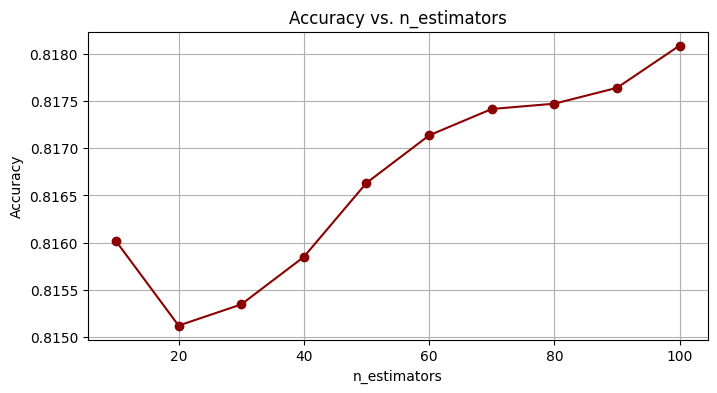

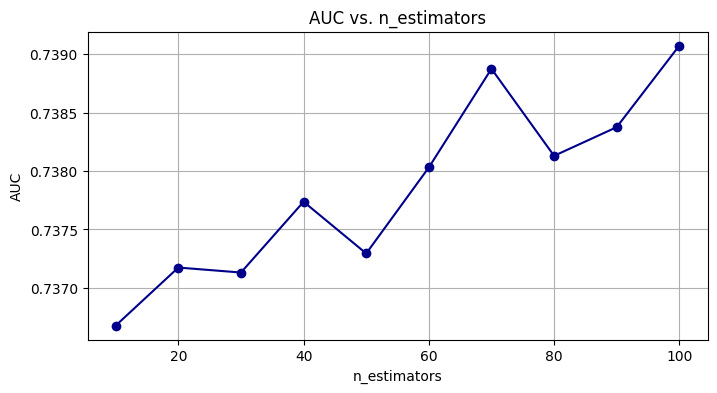

In [10]:
# Initialize lists to store results
accuracy_results = []
auc_results = []

# Define a range of values for n_estimators
n_estimators_options = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for n_estimators in n_estimators_options:
    # Initialize and train the model
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=101)
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy and AUC
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    # Append results to respective lists
    accuracy_results.append(accuracy)
    auc_results.append(auc)

# Plot Accuracy vs. n_estimators
plt.figure(figsize=(8, 4))
plt.plot(n_estimators_options, accuracy_results, color="darkred", marker="o")
plt.title("Accuracy vs. n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Plot AUC vs. n_estimators
plt.figure(figsize=(8, 4))
plt.plot(n_estimators_options, auc_results, color="darkblue", marker="o")
plt.title("AUC vs. n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("AUC")
plt.grid(True)
plt.show()


We can see an improvement in accuracy and AUC as the number of estimators increases for the most parts.

The **accuracy vs. n_estimators graph** shows a decrease initially and then a long increase, it suggests that the model's performance initially suffers from underfitting and then improves until it reaches an optimal point or possibly overfits as it continues to increase.

The **AUC vs. n_estimators graph** shows a consistently increasing trend for the entire range of n_estimators, it suggests that increasing the number of estimators continuously improves the model's ability to discriminate between positive and negative classes without encountering overfitting.

## **3. Building a Random Forest Model**

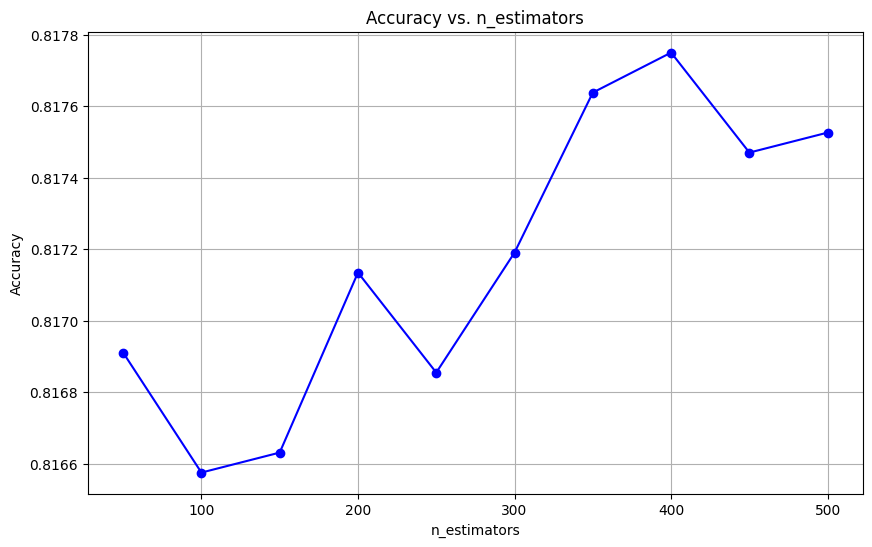

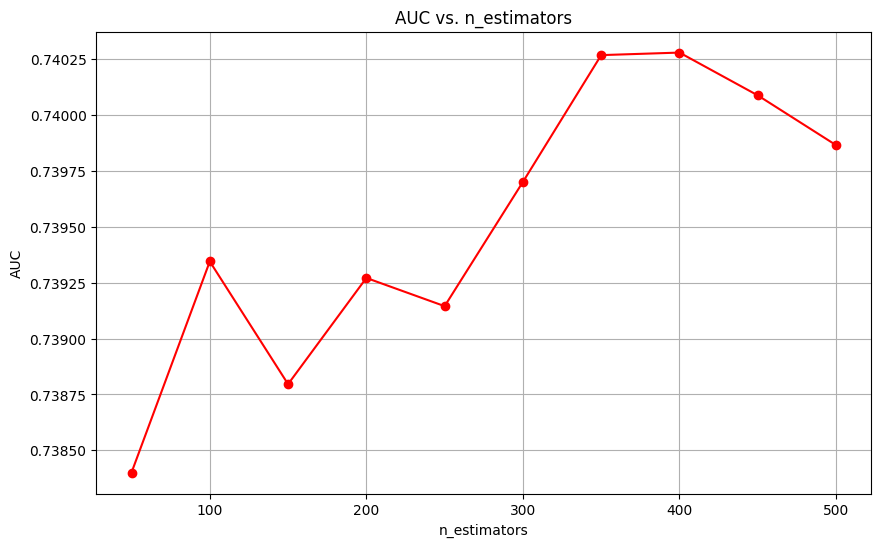

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Load your data and split it into features (X) and target (y)
# Assuming you have loaded your data into X and y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of n_estimators values
n_estimators_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Initialize lists to store results
accuracy_results = []
auc_results = []

# Train Random Forest models with different n_estimators values
for n_estimators in n_estimators_options:
    # Initialize and train the Random Forest model
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Calculate accuracy and AUC
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    # Append results to respective lists
    accuracy_results.append(accuracy)
    auc_results.append(auc)

# Plot Accuracy vs. n_estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_options, accuracy_results, color="blue", marker="o")
plt.title("Accuracy vs. n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Plot AUC vs. n_estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_options, auc_results, color="red", marker="o")
plt.title("AUC vs. n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("AUC")
plt.grid(True)
plt.show()


**Questions for Random Forest model**
1. The AUC increases from 150-400 estimators, before it decreases. The accuracy is best between 250-400 estimators.

2. Both the auccracy and AUC optimize at 400 estimators.


## **4. Building AdaBoost, Gradient Boost, and XGB**

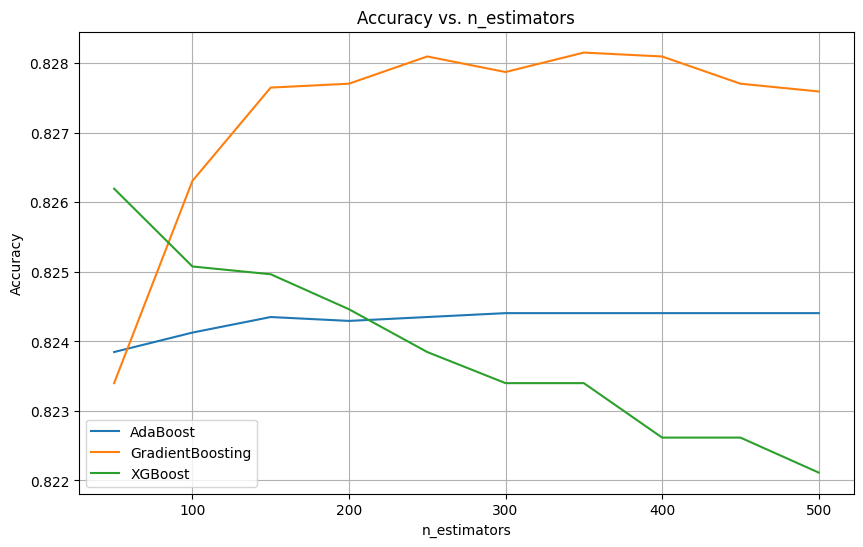

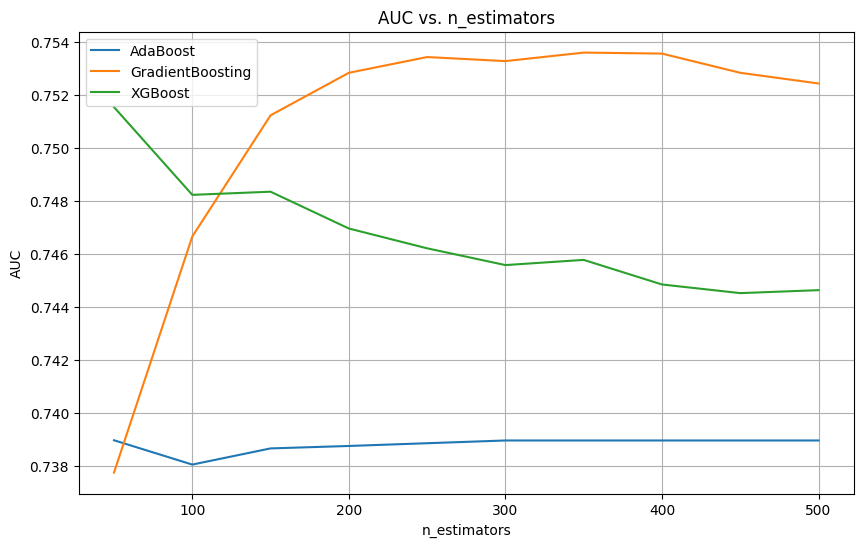

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Define a list of n_estimators values
n_estimators_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Initialize lists to store results
accuracy_results = {'AdaBoost': [], 'GradientBoosting': [], 'XGBoost': []}
auc_results = {'AdaBoost': [], 'GradientBoosting': [], 'XGBoost': []}

# Train models and collect results
for n_estimators in n_estimators_options:
    # Initialize and train classifiers
    ada_model = AdaBoostClassifier(n_estimators=n_estimators, random_state=42)
    gb_model = GradientBoostingClassifier(n_estimators=n_estimators, random_state=42)
    xgb_model = XGBClassifier(n_estimators=n_estimators, random_state=42)

    for model, model_name in [(ada_model, 'AdaBoost'), (gb_model, 'GradientBoosting'), (xgb_model, 'XGBoost')]:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate accuracy and AUC
        accuracy = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred)

        # Append results to respective lists
        accuracy_results[model_name].append(accuracy)
        auc_results[model_name].append(auc)

# Plot Accuracy vs. n_estimators
plt.figure(figsize=(10, 6))
for model_name, accuracies in accuracy_results.items():
    plt.plot(n_estimators_options, accuracies, label=model_name)

plt.title("Accuracy vs. n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Plot AUC vs. n_estimators
plt.figure(figsize=(10, 6))
for model_name, aucs in auc_results.items():
    plt.plot(n_estimators_options, aucs, label=model_name)

plt.title("AUC vs. n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("AUC")
plt.legend()
plt.grid(True)
plt.show()


The AUC is best for GradientBoosting at 400 estimators, XGBoost at 50 estimators, and AdaBoost at 300-500 estimators. The accuracy is best on average for all 3 models around 200 estimators.

## **5. Compare Performance**

In [ ]:
# Best values of Accuracy and AUC for each model
best_accuracy = {'Random Forest': 0.8177, 'AdaBoost': 0.824, 'Gradient Boost': 0.828, 'XGB': 0.826}
best_auc = {'Random Forest': 0.74026, 'AdaBoost': 0.739, 'Gradient Boost': 0.753, 'XGB': 0.752}

# Print the table
print("|           | Random Forest | AdaBoost | Gradient Boost | XGB     |")
print("|-----------|---------------|----------|----------------|---------|")
print(f"| Accuracy  | {best_accuracy['Random Forest']:.2f}          | {best_accuracy['AdaBoost']:.2f}     | {best_accuracy['Gradient Boost']:.2f}           | {best_accuracy['XGB']:.2f}    |")
print(f"| AUC       | {best_auc['Random Forest']:.2f}          | {best_auc['AdaBoost']:.2f}     | {best_auc['Gradient Boost']:.2f}           | {best_auc['XGB']:.2f}    |")

|           | Random Forest | AdaBoost | Gradient Boost | XGB     |
|-----------|---------------|----------|----------------|---------|
| Accuracy  | 0.82          | 0.82     | 0.83           | 0.83    |
| AUC       | 0.74          | 0.74     | 0.75           | 0.75    |


Gradient Boost and XGB are the best models, based on performance.